In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
accidents = pd.read_csv("../PrometneNesreče.csv")

C:\Users\Hana\AppData\Local\Temp\ipykernel_29024\901670543.py:1: DtypeWarning: Columns (31,32,33,34,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv("../PrometneNesreče.csv")


In [3]:
# Priprava podatkov
accidents['NastanekDatumCas'] = pd.to_datetime(accidents['NastanekDatumCas'], format='ISO8601', errors='coerce')
print(f"NastanekDatumCas column dtype: {accidents['NastanekDatumCas'].dtype}")
# display(accidents)

NastanekDatumCas column dtype: datetime64[ns]


#### Dodajanje stolpcev

In [4]:
day_translation = {
    'Monday': 'Ponedeljek',
    'Tuesday': 'Torek',
    'Wednesday': 'Sreda',
    'Thursday': 'Četrtek',
    'Friday': 'Petek',
    'Saturday': 'Sobota',
    'Sunday': 'Nedelja'
}
day_order_slo = ['Ponedeljek', 'Torek', 'Sreda', 'Četrtek', 'Petek', 'Sobota', 'Nedelja']

month_translation = {
    'January': 'Januar', 'February': 'Februar', 'March': 'Marec',
    'April': 'April', 'May': 'Maj', 'June': 'Junij',
    'July': 'Julij', 'August': 'Avgust', 'September': 'September',
    'October': 'Oktober', 'November': 'November', 'December': 'December'
}
month_order_slo = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']

accidents['Day_EN'] = accidents['NastanekDatumCas'].dt.day_name()
accidents['Day_SLO'] = accidents['Day_EN'].map(day_translation)

accidents['Mesec_EN'] = accidents['NastanekDatumCas'].dt.month_name()
accidents['Mesec_SLO'] = accidents['Mesec_EN'].map(month_translation)

accidents['Datum'] = accidents['NastanekDatumCas'].dt.date
accidents['Ura'] = accidents['NastanekDatumCas'].dt.hour

accidents['Teden'] = accidents['NastanekDatumCas'].dt.to_period('W').apply(lambda r: r.start_time)

accidents['Leto'] = accidents['NastanekDatumCas'].dt.year

# Severity
conditions = [
    (accidents['LjudjePoskodovani'] == 0) & (accidents['LjudjeMrtvi'] == 0),
    (accidents['LjudjePoskodovani'] != 0) & (accidents['LjudjeMrtvi'] == 0),
    (accidents['LjudjeMrtvi'] != 0)
]

# Določi oznake
severity_labels = ['no_injury', 'injury', 'death']

# Dodaj stolpec za severity
accidents['Severity'] = np.select(conditions, severity_labels, default='unknown')
# display(accidents)

# Analiza prometnih nesreč glede na letni čas

Za analizo bom uporabila meteorološke letne čase. Torej:
- zima: december, januar, februar,
- pomlad: marec, april, maj,
- poletje: junij, julij, avgust,
- jesen: september, oktober, november.

Za meteorološke letne čase sem se odločila, ker so bolj stabilni skozi leta in ker v primerjavi s koledarskimi letnimi časi bolj verodostojno odražajo vremenske vzorce, povezane s tveganji za nesreče (npr. poledica že v začetku decembra).

In [5]:
winter_mask = accidents['NastanekDatumCas'].dt.month.isin([12, 1, 2])
spring_mask = accidents['NastanekDatumCas'].dt.month.isin([3, 4, 5])
summer_mask = accidents['NastanekDatumCas'].dt.month.isin([6, 7, 8])
autumn_mask = accidents['NastanekDatumCas'].dt.month.isin([9, 10, 11])

winter_accidents = accidents[winter_mask]
spring_accidents = accidents[spring_mask]
summer_accidents = accidents[summer_mask]
autumn_accidents = accidents[autumn_mask]

# winter_accidents['hour'] = winter_accidents['NastanekDatumCas'].dt.hour
# spring_accidents['hour'] = spring_accidents['NastanekDatumCas'].dt.hour
# summer_accidents['hour'] = summer_accidents['NastanekDatumCas'].dt.hour
# autumn_accidents['hour'] = autumn_accidents['NastanekDatumCas'].dt.hour


In [14]:
oznake = ['Zima', 'Pomlad', 'Poletje', 'Jesen']

conditions = [
    accidents['NastanekDatumCas'].dt.month.isin([12, 1, 2]),  # Zima
    accidents['NastanekDatumCas'].dt.month.isin([3, 4, 5]),   # Pomlad
    accidents['NastanekDatumCas'].dt.month.isin([6, 7, 8]),   # Poletje
    accidents['NastanekDatumCas'].dt.month.isin([9, 10, 11])  # Jesen
]

accidents['Letni_cas'] = np.select(conditions, oznake, default='Unknown')

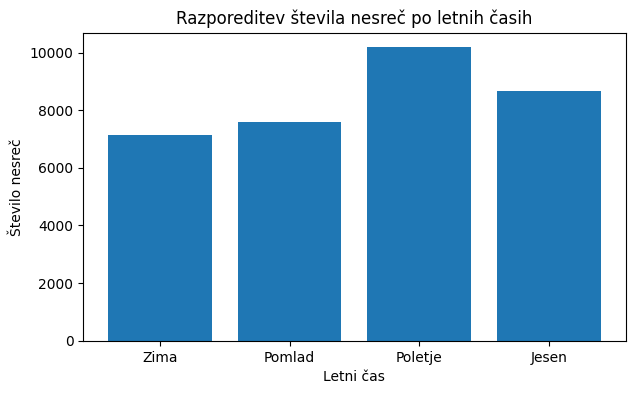

In [6]:
accident_count = [len(winter_accidents),
                  len(spring_accidents),
                  len(summer_accidents),
                  len(autumn_accidents)]

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, accident_count)

plt.xlabel('Letni čas')
plt.ylabel('Število nesreč')
plt.title('Razporeditev števila nesreč po letnih časih')

plt.show()

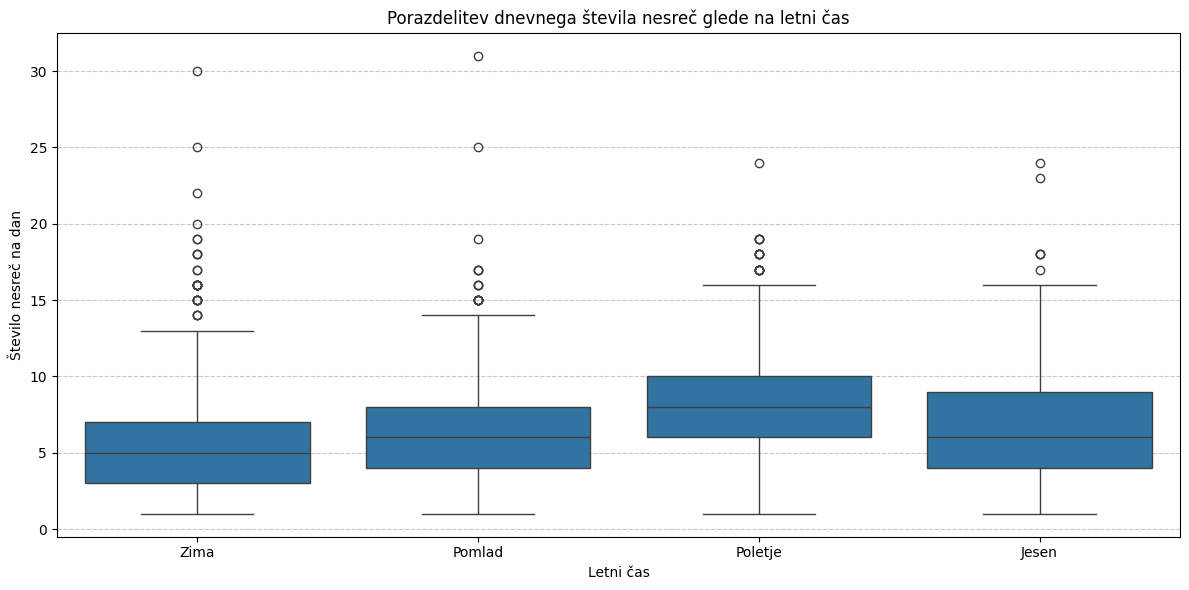

In [15]:
# BOXPLOT
# Najprej grupiram in preštejem nesreče
grouped = accidents.groupby(['Datum', 'Letni_cas']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Letni_cas', y='accident_count', order=oznake)
plt.title('Porazdelitev dnevnega števila nesreč glede na letni čas')
plt.xlabel('Letni čas')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# BOXPLOT
# Najprej grupiram in preštejem nesreče
grouped = accidents.groupby(['Datum', 'moon_phase_SLO']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='moon_phase_SLO', y='accident_count', order=lunine_mene)
plt.title('Porazdelitev dnevnega števila nesreč glede na lunino meno')
plt.xlabel('Lunina mena')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Resnost posledic prometnih nesreč glede na letni čas**

Tri kategorije nesreč:
- **Nesreče brez poškodovancev**: udeleženci niso bili poškodovani in nihče ni umrl
- **Nesreče s poškodbami**: nekateri udeleženci so bili poškodovani, vendar nihče ni umrl
- **Nesreče s smrtnim izidom**: vsaj eden od udeležencev je umrl (v nesreči so bili lahko tudi drugi, ki so bili poškodovani, vendar take nesreče ne štejem v kategorijo "Nesreče s poškodbami")

In [7]:
# Zima
mask_winter_no_injury = (winter_accidents['LjudjePoskodovani'] == 0) & (winter_accidents['LjudjeMrtvi'] == 0)
mask_winter_injury = (winter_accidents['LjudjePoskodovani'] != 0) & (winter_accidents['LjudjeMrtvi'] == 0)
mask_winter_death = (winter_accidents['LjudjeMrtvi'] != 0)

winter_no_injury = winter_accidents[mask_winter_no_injury]
winter_injury = winter_accidents[mask_winter_injury]
winter_death = winter_accidents[mask_winter_death]

# Pomlad
mask_spring_no_injury = (spring_accidents['LjudjePoskodovani'] == 0) & (spring_accidents['LjudjeMrtvi'] == 0)
mask_spring_injury = (spring_accidents['LjudjePoskodovani'] != 0) & (spring_accidents['LjudjeMrtvi'] == 0)
mask_spring_death = (spring_accidents['LjudjeMrtvi'] != 0)

spring_no_injury = spring_accidents[mask_spring_no_injury]
spring_injury = spring_accidents[mask_spring_injury]
spring_death = spring_accidents[mask_spring_death]

# Poletje
mask_summer_no_injury = (summer_accidents['LjudjePoskodovani'] == 0) & (summer_accidents['LjudjeMrtvi'] == 0)
mask_summer_injury = (summer_accidents['LjudjePoskodovani'] != 0) & (summer_accidents['LjudjeMrtvi'] == 0)
mask_summer_death = (summer_accidents['LjudjeMrtvi'] != 0)

summer_no_injury = summer_accidents[mask_summer_no_injury]
summer_injury = summer_accidents[mask_summer_injury]
summer_death = summer_accidents[mask_summer_death]

# Jesen
mask_autumn_no_injury = (autumn_accidents['LjudjePoskodovani'] == 0) & (autumn_accidents['LjudjeMrtvi'] == 0)
mask_autumn_injury = (autumn_accidents['LjudjePoskodovani'] != 0) & (autumn_accidents['LjudjeMrtvi'] == 0)
mask_autumn_death = (autumn_accidents['LjudjeMrtvi'] != 0)

autumn_no_injury = autumn_accidents[mask_autumn_no_injury]
autumn_injury = autumn_accidents[mask_autumn_injury]
autumn_death = autumn_accidents[mask_autumn_death]

In [8]:
accident_count = np.array([len(winter_accidents),
                           len(spring_accidents),
                           len(summer_accidents),
                           len(autumn_accidents)])

## Nesreče brez poškodovancev

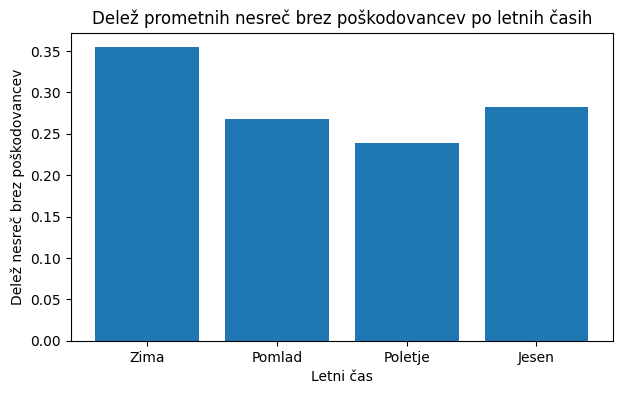

In [9]:
no_injury_count = np.array([len(winter_no_injury),
                  len(spring_no_injury),
                  len(summer_no_injury),
                  len(autumn_no_injury)])

no_injury_proportion = no_injury_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, no_injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč brez poškodovancev')
plt.title('Delež prometnih nesreč brez poškodovancev po letnih časih')

plt.show()

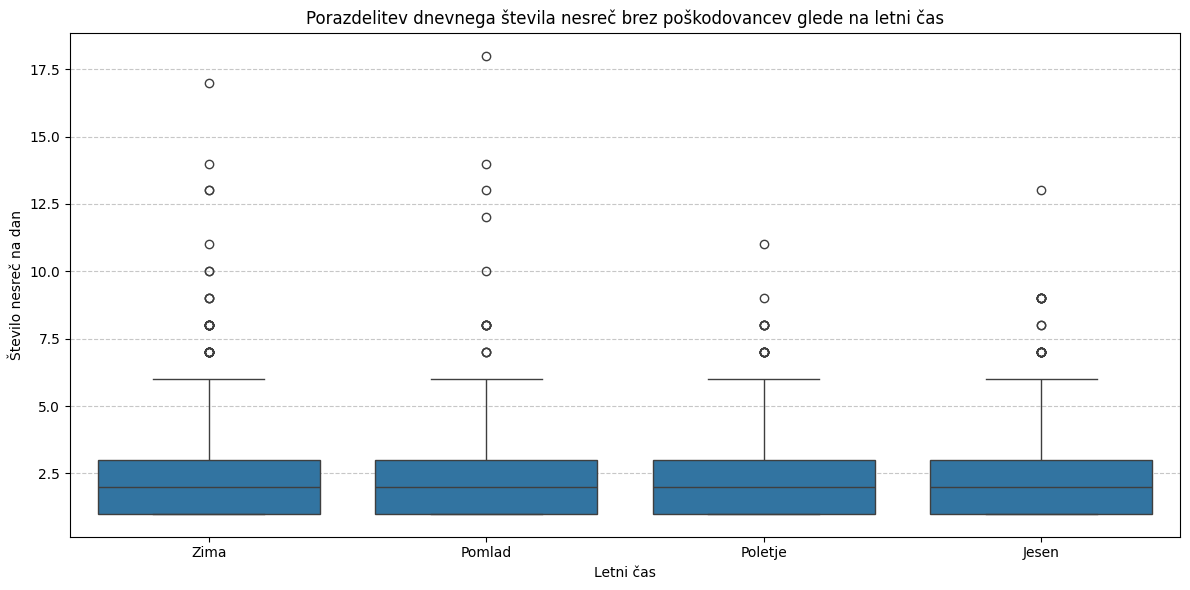

In [16]:
# BOXPLOT
mask_no_injury = (accidents['Severity'] == 'no_injury')
df_no_injury = accidents[mask_no_injury]

# Najprej grupiram in preštejem nesreče
grouped = df_no_injury.groupby(['Datum', 'Letni_cas']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Letni_cas', y='accident_count', order=oznake)
plt.title('Porazdelitev dnevnega števila nesreč brez poškodovancev glede na letni čas')
plt.xlabel('Letni čas')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Nesreče s poškodbami

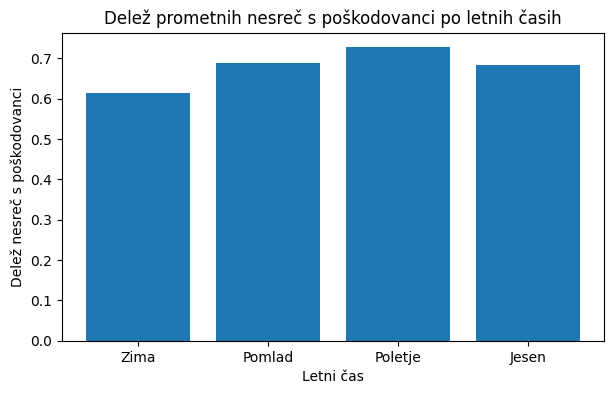

In [10]:
injury_count = np.array([len(winter_injury),
                  len(spring_injury),
                  len(summer_injury),
                  len(autumn_injury)])

injury_proportion = injury_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč s poškodovanci')
plt.title('Delež prometnih nesreč s poškodovanci po letnih časih')

plt.show()

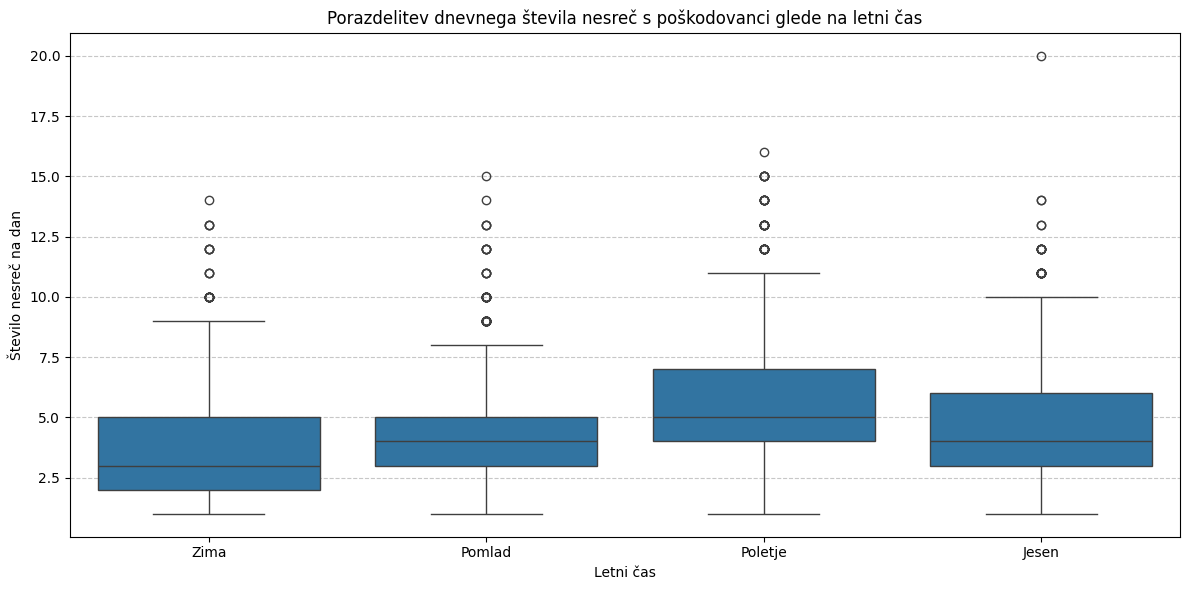

In [17]:
# BOXPLOT
mask_injury = (accidents['Severity'] == 'injury')
df_injury = accidents[mask_injury]

# Najprej grupiram in preštejem nesreče
grouped = df_injury.groupby(['Datum', 'Letni_cas']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Letni_cas', y='accident_count', order=oznake)
plt.title('Porazdelitev dnevnega števila nesreč s poškodovanci glede na letni čas')
plt.xlabel('Letni čas')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Nesreče s smrtnim izidom

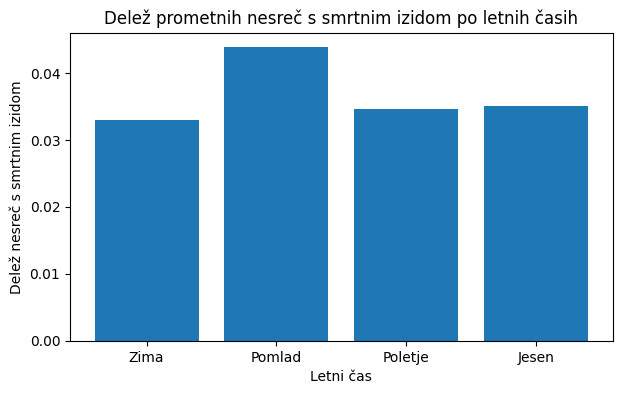

In [11]:
death_count = np.array([len(winter_death),
                  len(spring_death),
                  len(summer_death),
                  len(autumn_death)])

injury_proportion = death_count / accident_count

# Stolpčni diagram
plt.figure(figsize=(7, 4))
plt.bar(oznake, injury_proportion)

plt.xlabel('Letni čas')
plt.ylabel('Delež nesreč s smrtnim izidom')
plt.title('Delež prometnih nesreč s smrtnim izidom po letnih časih')

plt.show()

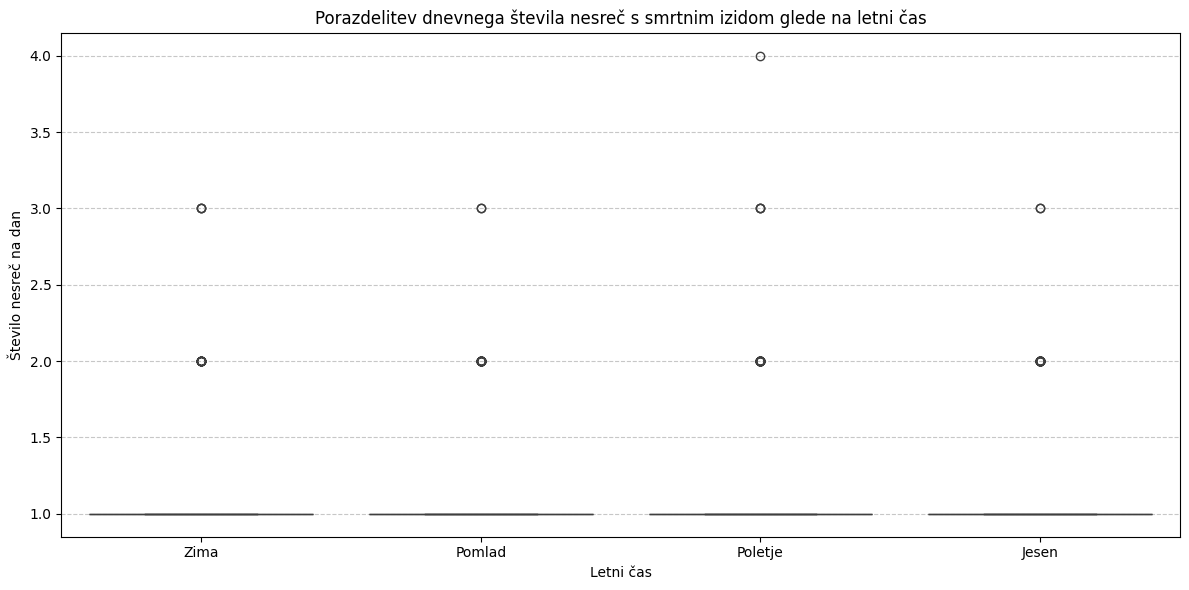

In [18]:
# BOXPLOT
mask_death = (accidents['Severity'] == 'death')
df_death = accidents[mask_death]

# Najprej grupiram in preštejem nesreče
grouped = df_death.groupby(['Datum', 'Letni_cas']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Letni_cas', y='accident_count', order=oznake)
plt.title('Porazdelitev dnevnega števila nesreč s smrtnim izidom glede na letni čas')
plt.xlabel('Letni čas')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Boxplot z vsemi tremi kategorijami nesreč

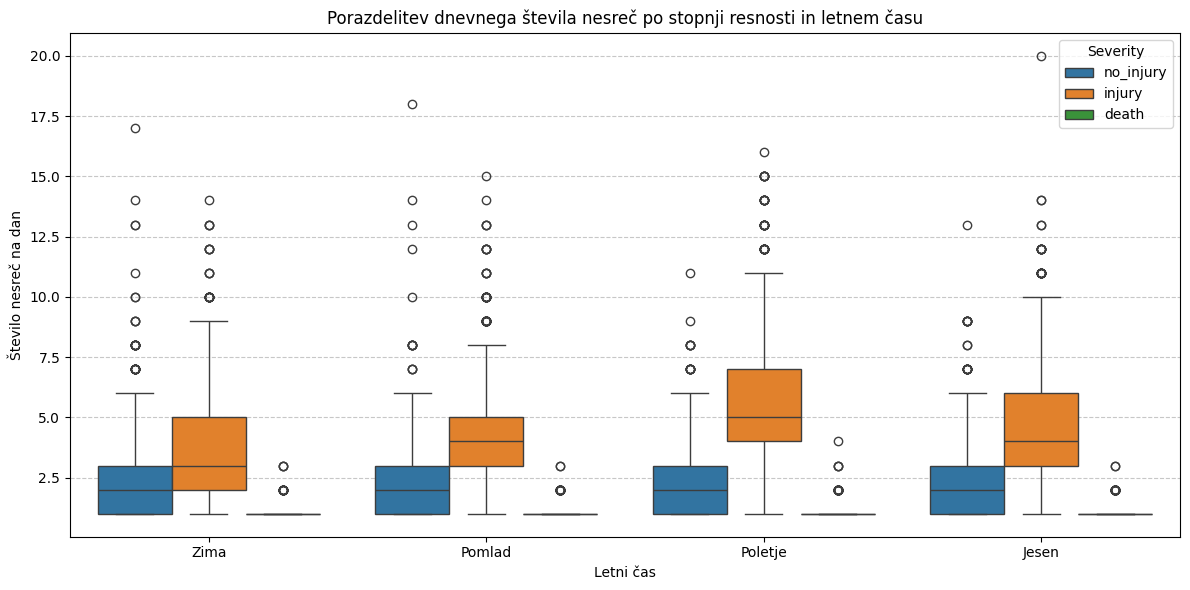

In [21]:
# BOXPLOT
# Najprej grupiram in preštejem nesreče
grouped = accidents.groupby(['Datum', 'Letni_cas', 'Severity']).size()
      
# Rezultat grupiranja pretvorim v dataframe in stolpec s preštetimi prometnimi nesrečami poimenujem 'accident_count'
df_accidents = grouped.reset_index(name='accident_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_accidents, x='Letni_cas', y='accident_count', hue='Severity', order=oznake)
plt.title('Porazdelitev dnevnega števila nesreč po stopnji resnosti in letnem času')
plt.xlabel('Letni čas')
plt.ylabel('Število nesreč na dan')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Heatmap

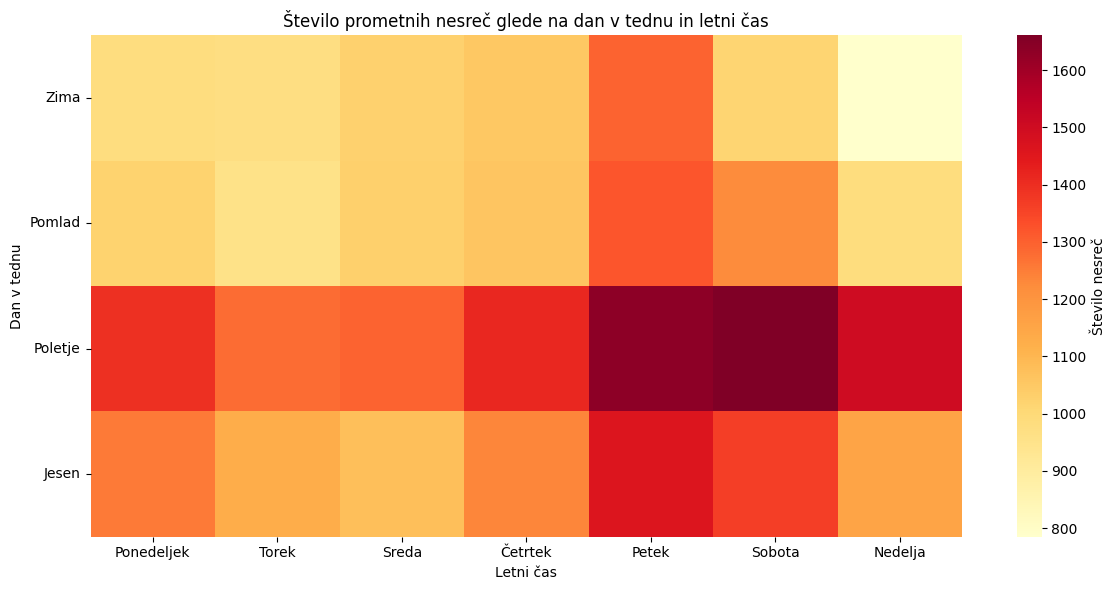

In [23]:
grouped = accidents.groupby(['Day_SLO', 'Letni_cas']).size()
grouped = grouped.reset_index(name='accident_count')

# Letne čase in dneve razporedi po vrstnem redu
cat_type_season = CategoricalDtype(categories=oznake, ordered=True)
cat_type_day = CategoricalDtype(categories=day_order_slo, ordered=True)
grouped['Letni_cas'] = grouped['Letni_cas'].astype(cat_type_season)
grouped['Day_SLO'] = grouped['Day_SLO'].astype(cat_type_day)
grouped = grouped.sort_values(['Letni_cas', 'Day_SLO'])

df_heatmap = grouped.pivot(index='Letni_cas', columns='Day_SLO', values='accident_count').fillna(0)
# display(df_heatmap)

# Heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(df_heatmap, 
            annot=False,
            cmap='YlOrRd',
            cbar_kws={'label': 'Število nesreč'})
plt.xlabel('Letni čas')
plt.ylabel('Dan v tednu')
plt.title('Število prometnih nesreč glede na dan v tednu in letni čas')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

Glede na ure

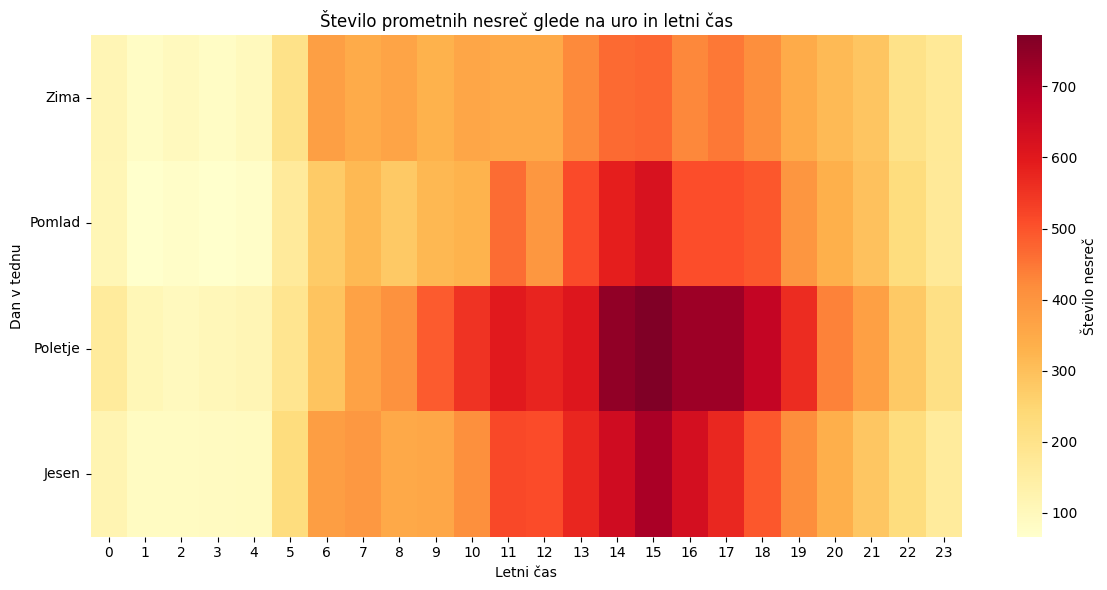

In [24]:
grouped = accidents.groupby(['Ura', 'Letni_cas']).size()
grouped = grouped.reset_index(name='accident_count')

# Letne čase razporedi po vrstnem redu
cat_type_season = CategoricalDtype(categories=oznake, ordered=True)
grouped['Letni_cas'] = grouped['Letni_cas'].astype(cat_type_season)
grouped = grouped.sort_values(['Letni_cas'])

grouped['Ura'] = grouped['Ura'].astype(int)   # Da bodo ure smatrane kot številke in ne stringi. Da se bodo pravilno razporedile po x-osi.

df_heatmap = grouped.pivot(index='Letni_cas', columns='Ura', values='accident_count').fillna(0)
# display(df_heatmap)

# Heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(df_heatmap, 
            annot=False,
            cmap='YlOrRd',
            cbar_kws={'label': 'Število nesreč'})
plt.xlabel('Letni čas')
plt.ylabel('Dan v tednu')
plt.title('Število prometnih nesreč glede na uro in letni čas')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()